In [3]:
import numpy as np
from matplotlib import pyplot as plt
# ----- Cord for importing .ipynb file as module -----
import sys  
import notebookutil as nbu
sys.meta_path.append(nbu.NotebookFinder())
# ----------------------------------------------------
from activate_functions import *


class nn_module:
    def __init__(self, layers_dims):
        self.nn_params = {}
        self.nn_grads = {}
        self.linear_outputs = {}
        self.act_outputs = {}
        self.L = len(layers_dims)
        init_w_range = (6 / (layers_dims[0]+layers_dims[-1])) ** 0.5
        for l in range(1, self.L):
            W = np.random.uniform(
                low = - init_w_range,
                high = init_w_range,
                size = (layers_dims[l], layers_dims[l-1])
            )
            b = np.zeros((layers_dims[l], 1))
            self.nn_params['W' + str(l)] = W
            self.nn_params['b' + str(l)] = b
            
    def forward_propagate(self, X, act_funcs):
        f = act_funcs['hidden_activate_function']
        g = act_funcs['output_activate_function']
        # Input Layer
        self.act_outputs['A0'] = X
        A = self.act_outputs['A0']
        # Hidden Layers
        for l in range(1, self.L - 1):
            W = self.nn_params['W' + str(l)]
            b = self.nn_params['b' + str(l)]
            Z = np.dot(W, A) + b
            A = f(Z)
            self.linear_outputs['Z' + str(l)] = Z
            self.act_outputs['A' + str(l)] = A
        # Output Layer
        W = self.nn_params['W' + str(self.L - 1)]
        b = self.nn_params['b' + str(self.L - 1)]
        Z = np.dot(W, A) + b
        A = g(Z)
        self.linear_outputs['Z' + str(self.L - 1)] = Z
        self.act_outputs['A' + str(self.L - 1)] = A
        
    def compute_cost(self, Y):
        m = Y.shape[1]
        AL = self.act_outputs['A' + str(self.L - 1)]
        # Cost function is cross entoropy loss
        cost = - np.sum(Y * np.log(AL) + (1 - Y) * np.log(1 - AL)) / m
        cost = np.squeeze(cost)
        # --------------------------------------------------------------
        assert(cost.shape == ())
        # --------------------------------------------------------------
        return cost
    
    def back_propagate(self, Y, act_funcs):
        m = Y.shape[1]
        df = act_funcs['derivative_hidden_activate_function']
        dg = act_funcs['derivative_output_activate_function']
        # Output Layer
        A = self.act_outputs['A' + str(self.L - 1)]
        A_prev = self.act_outputs['A' + str(self.L - 2)]
        Z = self.linear_outputs['Z' + str(self.L - 1)]
        dA = - (np.divide(Y, A) - np.divide(1 - Y, 1 - A)) / m
        dZ = dA * dg(Z)
        dW = np.dot(dZ, A_prev.T)
        db = np.sum(dZ, axis = 1, keepdims = True)
        # --------------------------------------------------------------
        assert(dA.shape == A.shape)
        assert(dW.shape == self.nn_params['W' + str(self.L - 1)].shape)
        assert(db.shape == self.nn_params['b' + str(self.L - 1)].shape)
        # --------------------------------------------------------------
        self.nn_grads['dW' + str(self.L - 1)] = dW
        self.nn_grads['db' + str(self.L - 1)] = db
        # Hidden Layers
        for l in reversed(range(1, self.L - 1)):
            W = self.nn_params['W' + str(l)]
            W_foll = self.nn_params['W' + str(l + 1)]
            A = self.act_outputs['A' + str(l)]
            A_prev = self.act_outputs['A' + str(l - 1)]
            Z = self.linear_outputs['Z' + str(l)]
            dA = np.dot(W_foll.T, dZ)
            dZ = dA * df(Z)
            dW = np.dot(dZ, A_prev.T)
            db = np.sum(dZ, axis = 1, keepdims = True)
            # ----------------------------------------------------------
            assert(dA.shape == A.shape)
            assert(dW.shape == self.nn_params['W' + str(l)].shape)
            assert(db.shape == self.nn_params['b' + str(l)].shape)
            # ----------------------------------------------------------
            self.nn_grads['dW' + str(l)] = dW
            self.nn_grads['db' + str(l)] = db

    def update_nn_params(self, learning_rate):
        for l in range(1, self.L):
            W = self.nn_params['W' + str(l)]
            b = self.nn_params['b' + str(l)]
            dW = self.nn_grads['dW' + str(l)]
            db = self.nn_grads['db' + str(l)]
            W -= learning_rate * dW
            b -= learning_rate * db

    def test_nn(self, X, act_funcs):
        f = act_funcs['hidden_activate_function']
        g = act_funcs['output_activate_function']
        # Input Layer
        A = X
        # Hidden Layers
        for l in range(1, self.L - 1):
            W = self.nn_params['W' + str(l)]
            b = self.nn_params['b' + str(l)]
            Z = np.dot(W, A) + b
            A = f(Z)
        # Output Layer
        W = self.nn_params['W' + str(self.L - 1)]
        b = self.nn_params['b' + str(self.L - 1)]
        Z = np.dot(W, A) + b
        A = g(Z)
        return A

0 0.8638161847958044
1000 0.690680883023493
2000 0.6600268060913091
3000 0.4214941490146277
4000 0.12912527808289814
5000 0.06189192513367282
6000 0.03925242337565369
7000 0.028408387224298108
8000 0.022144435889598992
9000 0.018093859219627233


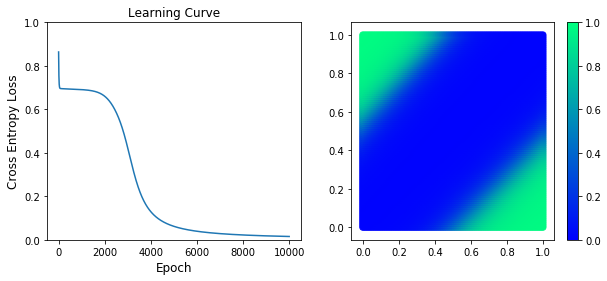

In [17]:
if __name__=='__main__':
    # ------< Hyperparameter >------
    EPOCH = 10000
    error_boundary = 1e-3
    nn = nn_module([2, 2, 1])
    learning_rate = 0.1
    """
    Choose activate functions of hidden layers and output layer.
    Sigmoid, ReLU, tanh can be choosen for activate functions.
    name_haf: Name of Hidden-layers Activate Function
    name_oaf: Name of Output-layer Activate Function
    """
    act_funcs = return_act_funcs(
        name_haf = 'sigmoid',
        name_oaf = 'sigmoid'
    )
    
    # ------< Training and Teaching Data >------
    TRAINING_DATA = np.array(
        [[0.0, 0.0], [1.0, 0.0], [0.0, 1.0], [1.0, 1.0]]
    ).T
    TEACHING_DATA = np.array([[0.0], [1.0], [1.0], [0.0]]).T
    
    # ------< Learning Data >------
    cost = []
    training_data_indexes = np.arange(len(TRAINING_DATA))
    for epoch in range(EPOCH):
        nn.forward_propagate(TRAINING_DATA, act_funcs)
        cost.append(nn.compute_cost(TEACHING_DATA))
        nn.back_propagate(TEACHING_DATA, act_funcs)
        nn.update_nn_params(learning_rate)
        if epoch % 1000 == 0:
            print(epoch, cost[epoch])
        if cost[epoch] < error_boundary:
            print(epoch, cost[epoch])
            print('----- Learning End -----')
            break
#     print(nn.test_nn((TRAINING_DATA), act_funcs))

    # ------< Plot Learning Result >------
    x = np.arange(0.0, 1.01, 0.01)
    y = np.arange(0.0, 1.01, 0.01)
    Z = np.zeros((len(x), len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            inputs = np.array([[x[i]], [y[j]]])
            outputs = nn.test_nn(inputs, act_funcs)
            Z[i][j] = np.squeeze(outputs)
    X, Y = np.meshgrid(x, y)

    plt.figure(figsize = (10, 4))
    plt.subplot(121)
    plt.plot(np.arange(len(cost)), cost)
    plt.title('Learning Curve')
    plt.xlabel('Epoch', fontsize = 12)
    plt.ylabel('Cross Entropy Loss', fontsize = 12)
    plt.ylim(0.0, 1.0)

    plt.subplot(122)
    plt.scatter(X, Y, c = Z, cmap = 'winter', vmin = 0, vmax = 1)
    plt.colorbar()